# 합성곱 신경망을 사용한 이미지 분류

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## 합성곱 신경망 만들기

In [2]:
model = keras.Sequential()

In [3]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', 
                              input_shape=(28,28,1)))

In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

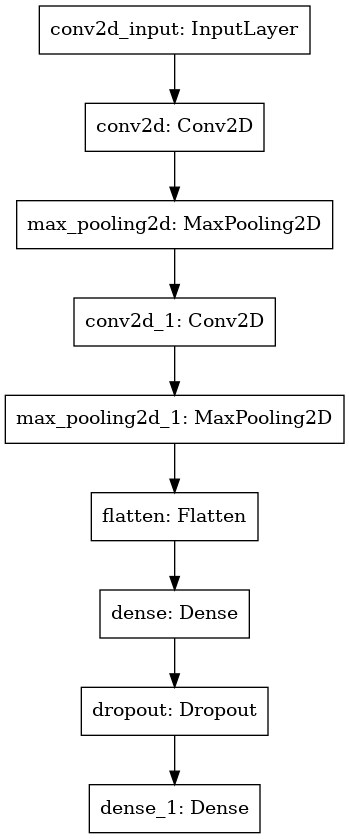

In [8]:
keras.utils.plot_model(model)

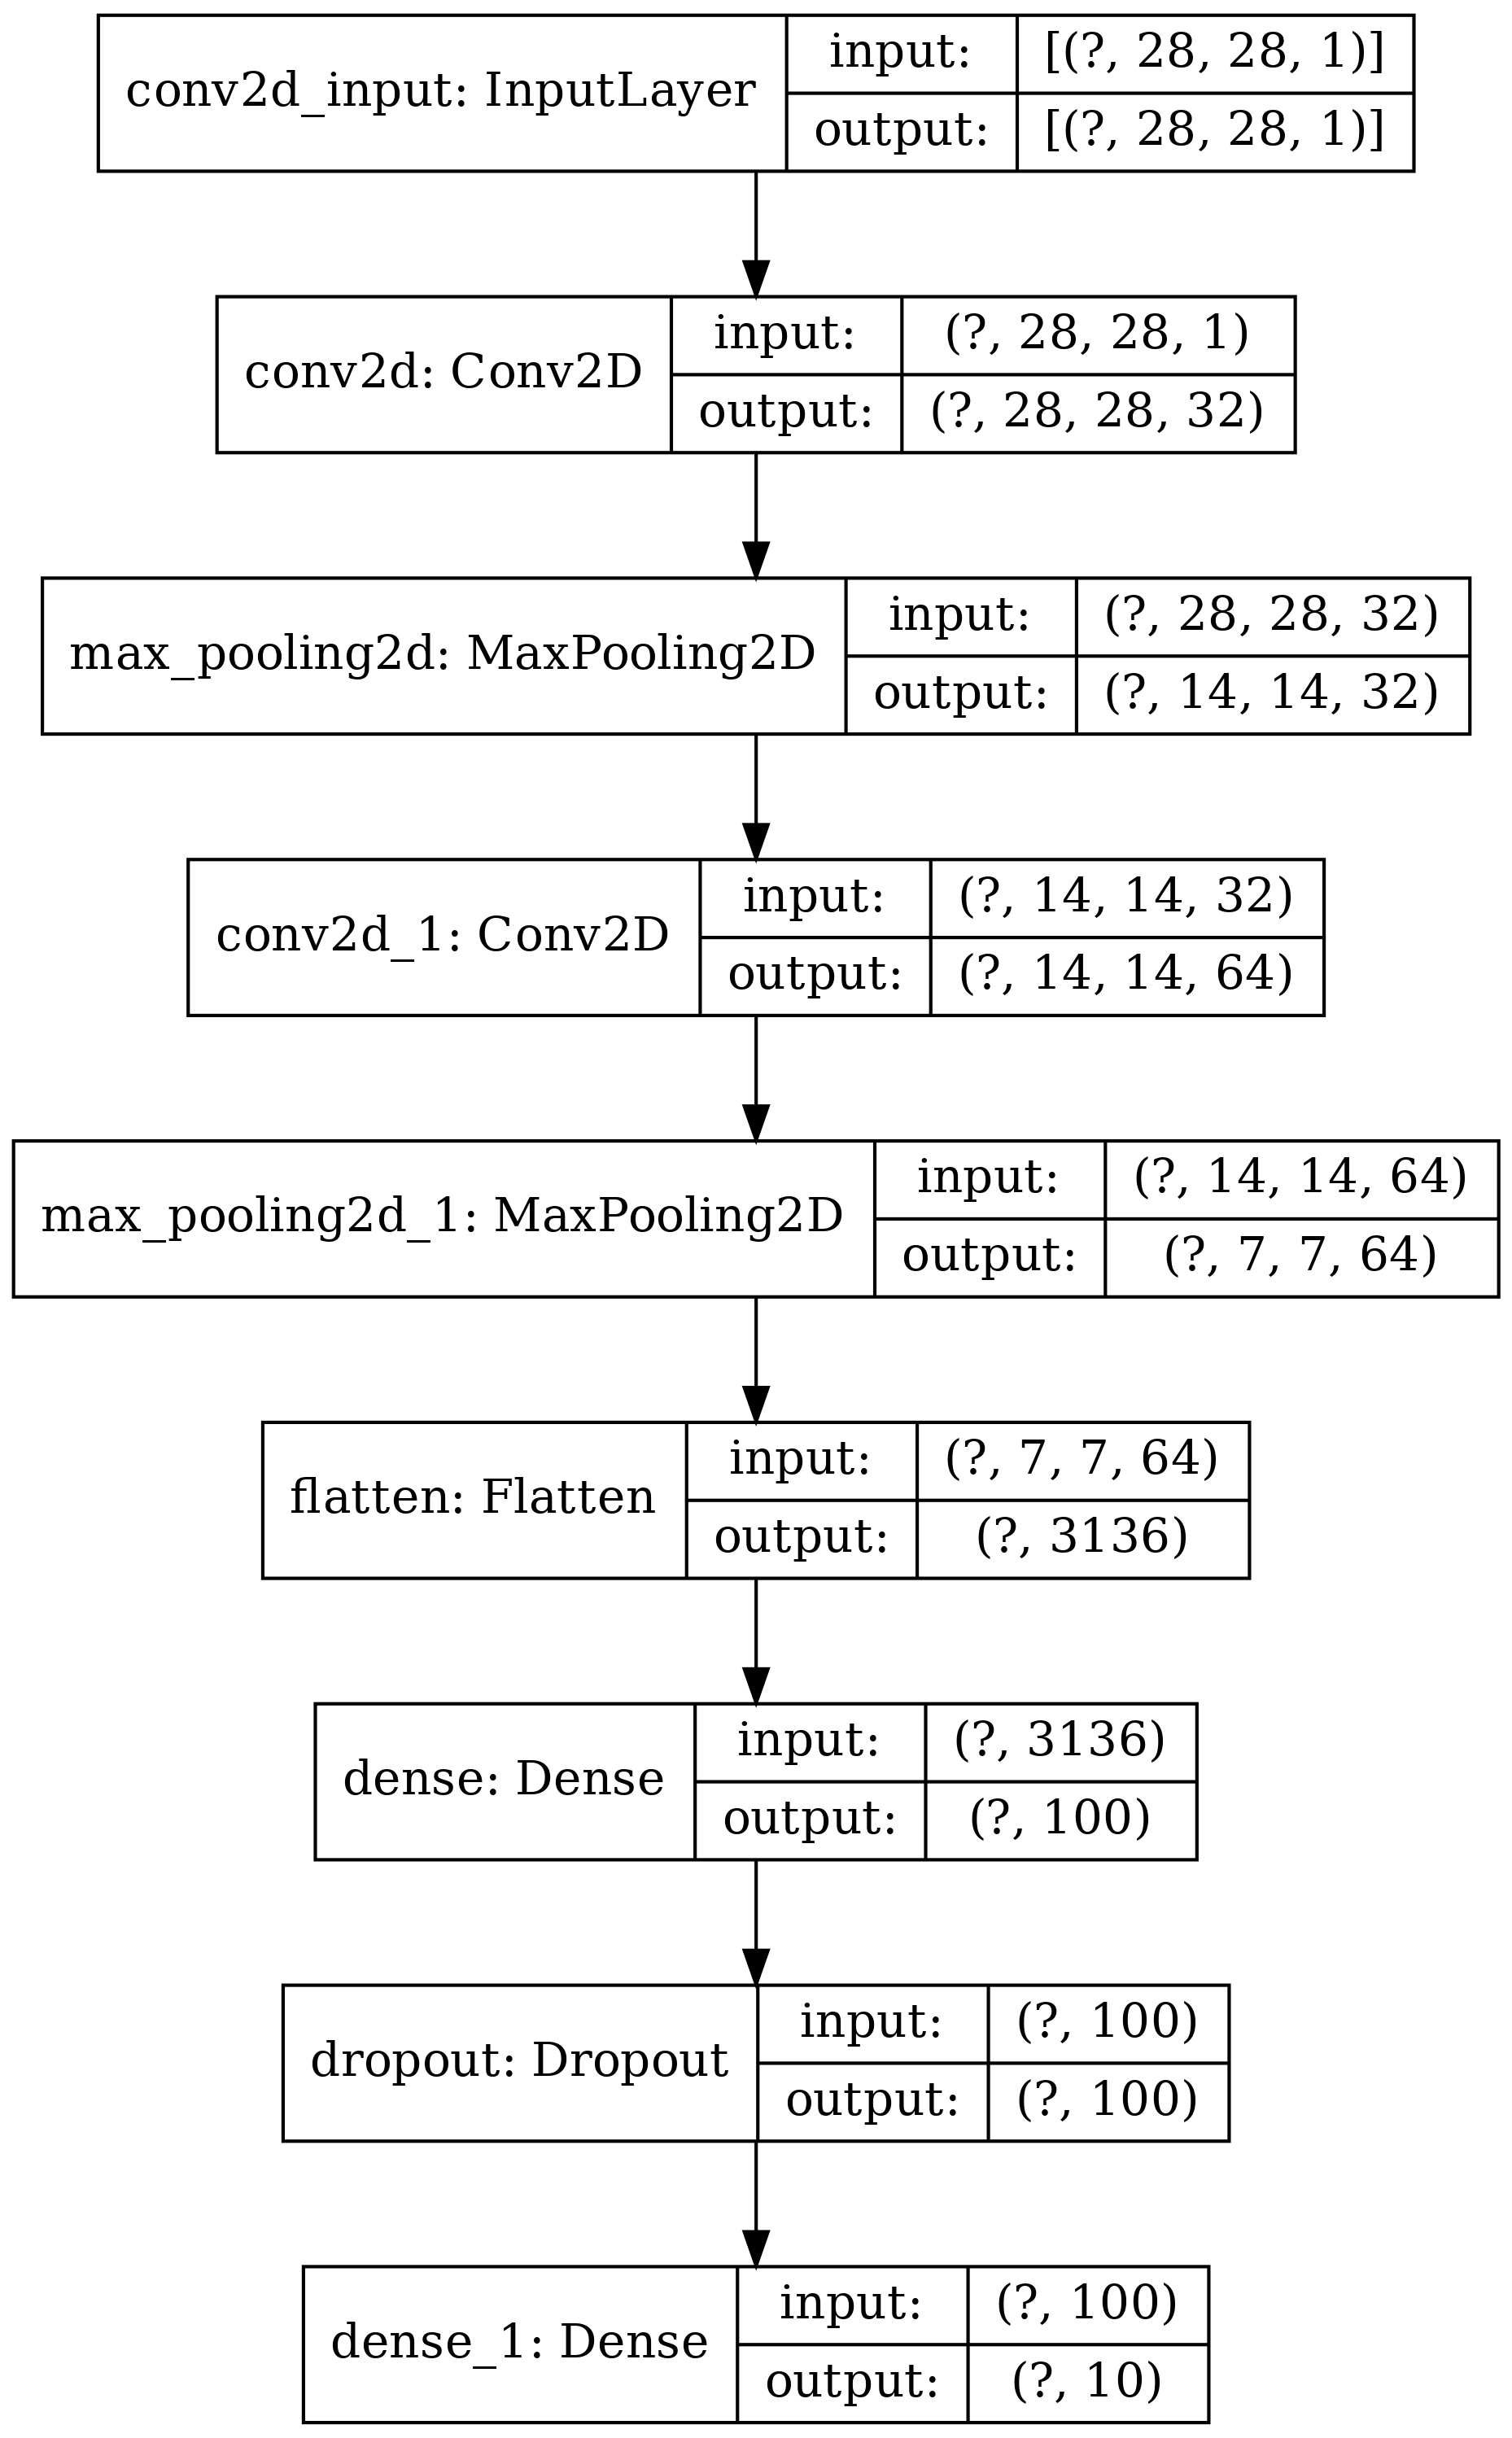

In [9]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

## 모델 컴파일과 훈련

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5244 - accuracy: 0.8113 - val_loss: 0.3322 - val_accuracy: 0.8781
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3442 - accuracy: 0.8755 - val_loss: 0.2741 - val_accuracy: 0.8986
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2970 - accuracy: 0.8916 - val_loss: 0.2670 - val_accuracy: 0.9015
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2652 - accuracy: 0.9030 - val_loss: 0.2355 - val_accuracy: 0.9107
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2370 - accuracy: 0.9130 - val_loss: 0.2334 - val_accuracy: 0.9135
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2202 - accuracy: 0.9207 - val_loss: 0.2232 - val_accuracy: 0.9170
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2021 - accuracy: 0.9254 - val_loss: 0.2217 - val_accuracy:

In [11]:
import matplotlib.pyplot as plt

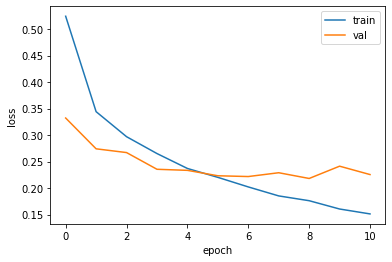

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2181 - accuracy: 0.9207


[0.21810764074325562, 0.9206666946411133]

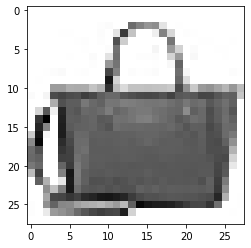

In [14]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [16]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[4.0362595e-20 8.7993505e-24 2.8687454e-23 4.6886415e-23 1.2107148e-24
  7.2903266e-17 6.7862027e-20 5.6720560e-19 1.0000000e+00 7.6959887e-22]]


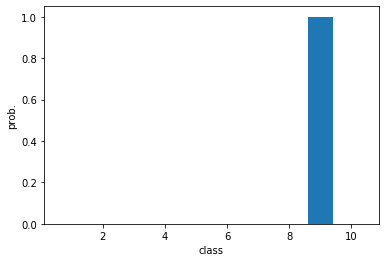

In [20]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [15]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [17]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [18]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [19]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2457 - accuracy: 0.9124


[0.24567578732967377, 0.9124000072479248]